# TP 2 : Signature Plot, Epps Effect and Link between Spread and Volatility per trade

## I. Volatility Estimator and Signature Plot

### 1. Signature Plot

Let $P$ be the price process, $X=\log P$ be the log-price process and $\Delta$ the discretization step over a time period $[0,T]$. Set for every $j\in{1,\ldots,T/\Delta}$, $r_{\Delta}(j)=X_{\Delta j}-X_{\Delta(j-1)}$ the log-price increments. Thus, in the Itô semi-martingale framework, the integrated variance reads
$$\int_0^T\sigma^2_sds=\lim_{\Delta\to0}\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2.$$
Consequently, a "natural" estimator for the integrated variance is 
$$\hat{V}_R(\Delta)=\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2.$$
This estimator is consistent since 
$$\hat{V}_R(\Delta)\overset{\mathbb{P}}{\underset{\Delta\to0}{\longrightarrow}}\int_0^T\sigma^2_sds.$$

They are many other ways to estimate the volatility: for example by using the minimum and the maximum of the price (see Garman & Klass), by considering multi-scale (see Ait-Sahalia or Ait-Sahalia & Jacod}) or by bid-ask modeling (see Robert & Rosenbaum).

**Observations and microstructure.** A model for log-price observation $X$ may be $X=M+\varepsilon$, where $M$ is a semi-martingale and $\varepsilon$ is the noise. Consequently
$$r_{\Delta}(j)=M_{\Delta j}-M_{\Delta(j-1)}+\varepsilon_{\Delta j}-\varepsilon_{\Delta(j-1)}=r^M_{\Delta}(j)+\eta_{\Delta}(j).$$
Thus the realized varince reads
$$\hat{V}_R(\Delta)=\sum_{j=1}^{T/\Delta}r_{\Delta}(j)^2=\sum_{j=1}^{T/\Delta}r^M_{\Delta}(j)^2+\sum_{j=1}^{T/\Delta}\eta_{\Delta}(j)^2+\sum_{j=1}^{T/\Delta}r^M_{\Delta}(j)\eta_{\Delta}(j).$$
This estimator diverges when $\Delta\to0$.

<font color='blue'>**To do.** Plot $\hat{V}_R(\Delta)$ with respect to $\Delta$ (in minutes and seconds) for all the assets. Do it for the mid-prices and the log-mid-prices. Comment the results.</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_theme() 
from tqdm import tqdm
warnings.filterwarnings("ignore")

stocksEU = ["BOUYGUES", "LVMH", "SANOFI", "TOTAL"]
stocksUS = ["AMAZON", "APPLE", "GOOGLE"]
stocksJP = ["SONY", "PANASONIC", "CANON"]
markets = {'Paris' : stocksEU, "NASDAQ" : stocksUS, "TOKYO" : stocksJP}

100%|██████████| 120/120 [00:01<00:00, 60.80it/s]


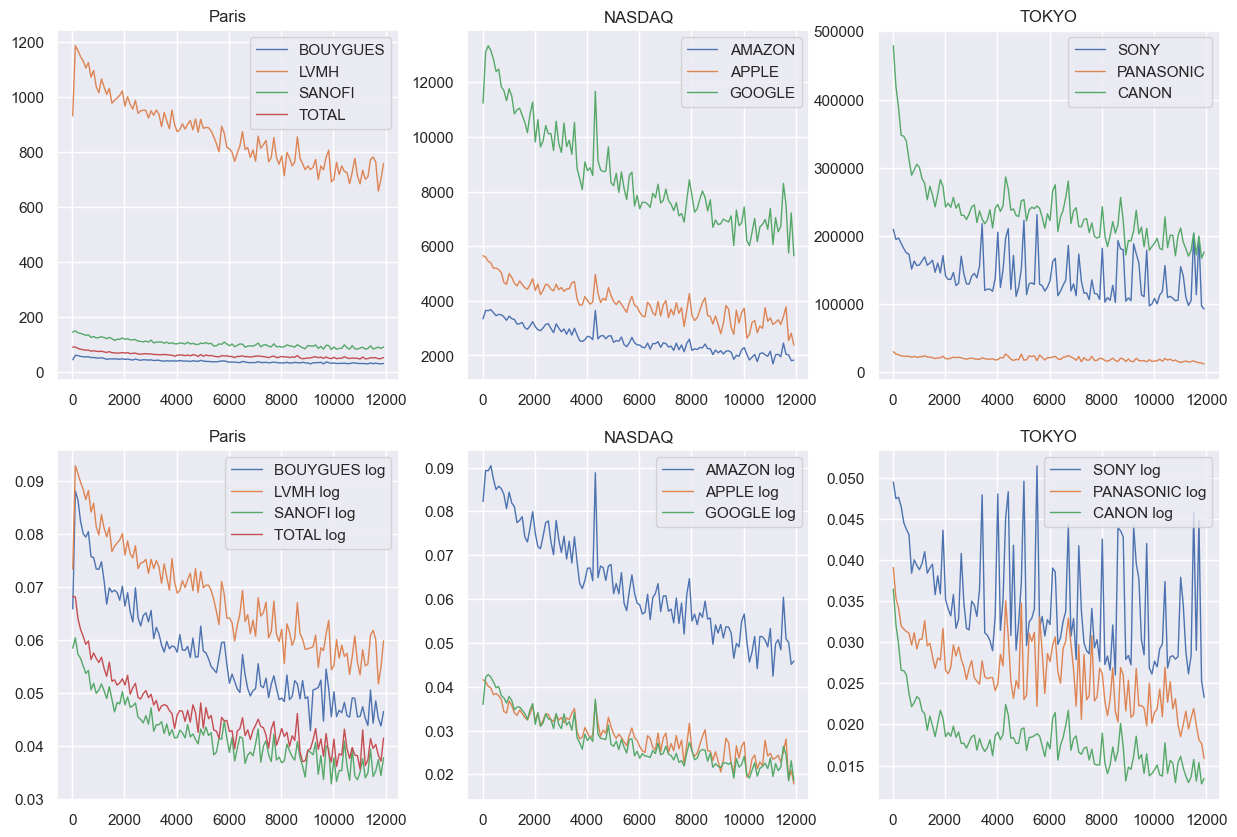

In [2]:
step_size = range(20, 12000, 100)
steps = [f"{i}s" for i in step_size]
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, market in enumerate(markets):
    ax[0][i].set_title(market)
    ax[1][i].set_title(market)
    for stock in markets[market]: 
        variances = []
        variancesLog = []
        df = pd.read_hdf(f'Data/{stock}.h5')
        df["MidPrice"] = (df["AskPrice"] + df["BidPrice"])/2
        for step in tqdm(steps):
            dfPrice = (df["MidPrice"]).resample(step).last() 
            var = ((dfPrice.diff().dropna())**2).sum()
            varLog =((np.log(dfPrice).diff().dropna())**2).sum()
            variances.append(var)
            variancesLog.append(varLog)
        variance_ts = pd.Series(variances, index=step_size)
        varianceLog_ts = pd.Series(variancesLog, index=step_size)
        variance_ts.plot(ax=ax[0][i], linewidth=1, label =stock)
        varianceLog_ts.plot(ax=ax[1][i], linewidth=1, label =stock + ' log')
    ax[0][i].legend()
    ax[1][i].legend()
plt.show()

****Commentary****

**Dynamic Variance Behavior**: Plotting realized variance against sampling intervals reveals striking differences in behavior between mid-prices and log-mid-prices.

**Noise Impact**: As the sampling interval widens, mid-price variance skyrockets—an effect driven by market microstructure noise. Even log-mid-price data isn’t immune, becoming erratic at larger intervals.

**Asset-Specific Patterns**: Some stocks, like SONY, show a clear spike in variance at a few-second interval, suggesting an underlying cyclical pattern in its trading dynamics.

**Steadier Profiles**: Others, such as TOTAL, exhibit a smoother, more gradual decline in variance, indicating a more stable volatility behavior across different sampling frequencies.

**Commentary**: These findings underscore the necessity of selecting an appropriate sampling frequency in high-frequency volatility estimation to mitigate the distortions caused by microstructure noise.

### 2. Intraday Volatility Estimator of Garman and Klass

They consider consider intraday volatility estimators that are based upon the historical opening, closing, high, and low prices and transaction volume. Since high and low prices require continuous monitoring to obtain, they correspondingly contain superior information content, exploited herein.

Their model assumes that a diffusion process governs security prices
$$P_t = \Phi(X_t)$$
where $P$ is the security price, $t$ is time, $\Phi$ is a monotonic, time-independent transformation, and $X_t$ is a diffusion process with the differential representation
$$dX_t = \sigma dW_t$$
where $W_t$ is the standard Brownian motion and $\sigma$ is an unknown constant to be estimated.

**"Best" Analytic Scale-invariant Estimators**

They consider estimators depending on
- the opening price,
- the closing price,
- the high price
- the low price.

For the authors, an estimator is "best" when it has minimum variance and is unbiased. They also impose the requirements that the estimators be analytic with price and time symmetries and scale-invariant. Under regularity condition (analytic in a neighborhood of the
origin), they obtain that the estimator must be quadratic in its arguments. Owing scale invariance and analyticity, they reduce the problem and find the "best" estimator of this form (unbiased with minimum variance). 

Finally, by eliminating the cross-product terms, the recommended and "more practical" estimator reads
$$\sigma_{GK}^2 =\left({High}-{Low}\right)^2 -(2\ln 2-1)\left({Close}-{Open}\right)^2 $$

<font color='blue'>**To do.** 1. Compute the integrated variance with the Garman-Klass volatility estimator of both mid- and log-mid prices with respect to $\Delta$. Compare the results with the previous one.</font>

100%|██████████| 120/120 [00:02<00:00, 58.11it/s]


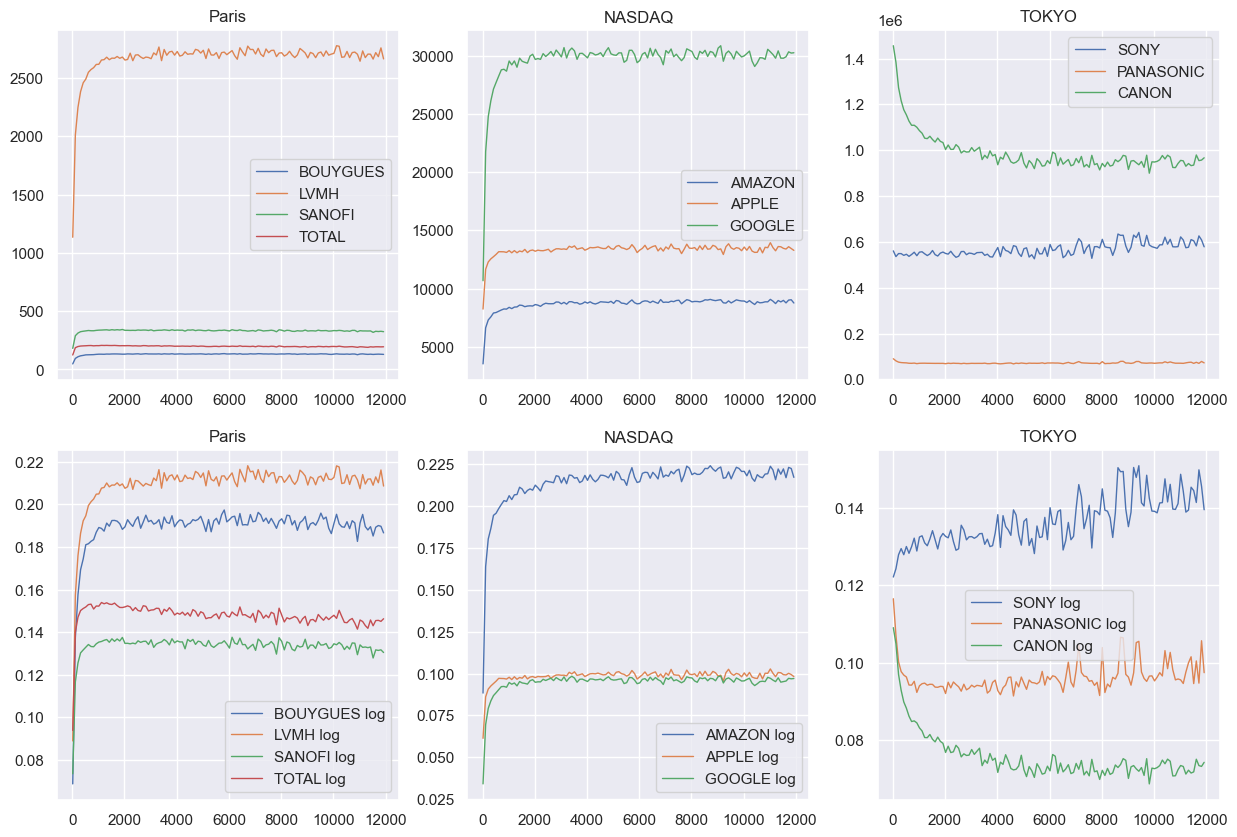

In [3]:
step_size = range(20, 12000, 100)
steps = [f"{i}s" for i in step_size]
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, market in enumerate(markets):
    ax[0][i].set_title(market)
    ax[1][i].set_title(market)
    for stock in markets[market]: 
        variancesGK = []
        variancesLogGK = []
        df = pd.read_hdf(f'Data/{stock}.h5')
        for step in tqdm(steps):
            dfPrice = df['TradedPrice'].resample(step).ohlc()
            dfLogPrice = np.log(dfPrice)
            varGK = ((dfPrice["high"] - dfPrice["low"])**2 - (2 * np.log(2) - 1)*(dfPrice["close"] - dfPrice["open"])**2).sum()
            varLogGK = ((dfLogPrice["high"] - dfLogPrice["low"])**2 - (2 * np.log(2) - 1)*(dfLogPrice["close"] - dfLogPrice["open"])**2).sum()
            variancesGK.append(varGK)
            variancesLogGK.append(varLogGK)
        varianceGK_ts = pd.Series(variancesGK, index=step_size)
        varianceLogGK_ts = pd.Series(variancesLogGK, index=step_size)

        varianceGK_ts.plot(ax=ax[0][i], linewidth=1, label =stock)
        varianceLogGK_ts.plot(ax=ax[1][i], linewidth=1, label =stock + ' log')
    ax[0][i].legend()
    ax[1][i].legend()
plt.show()

<font color='blue'> 2. Compute the daily volatility with $$\sigma_{GK}$$ and $$\hat{\sigma}$$ (the standard deviation of the mid-price and log-mid-price). Compare and comment the results.</font>

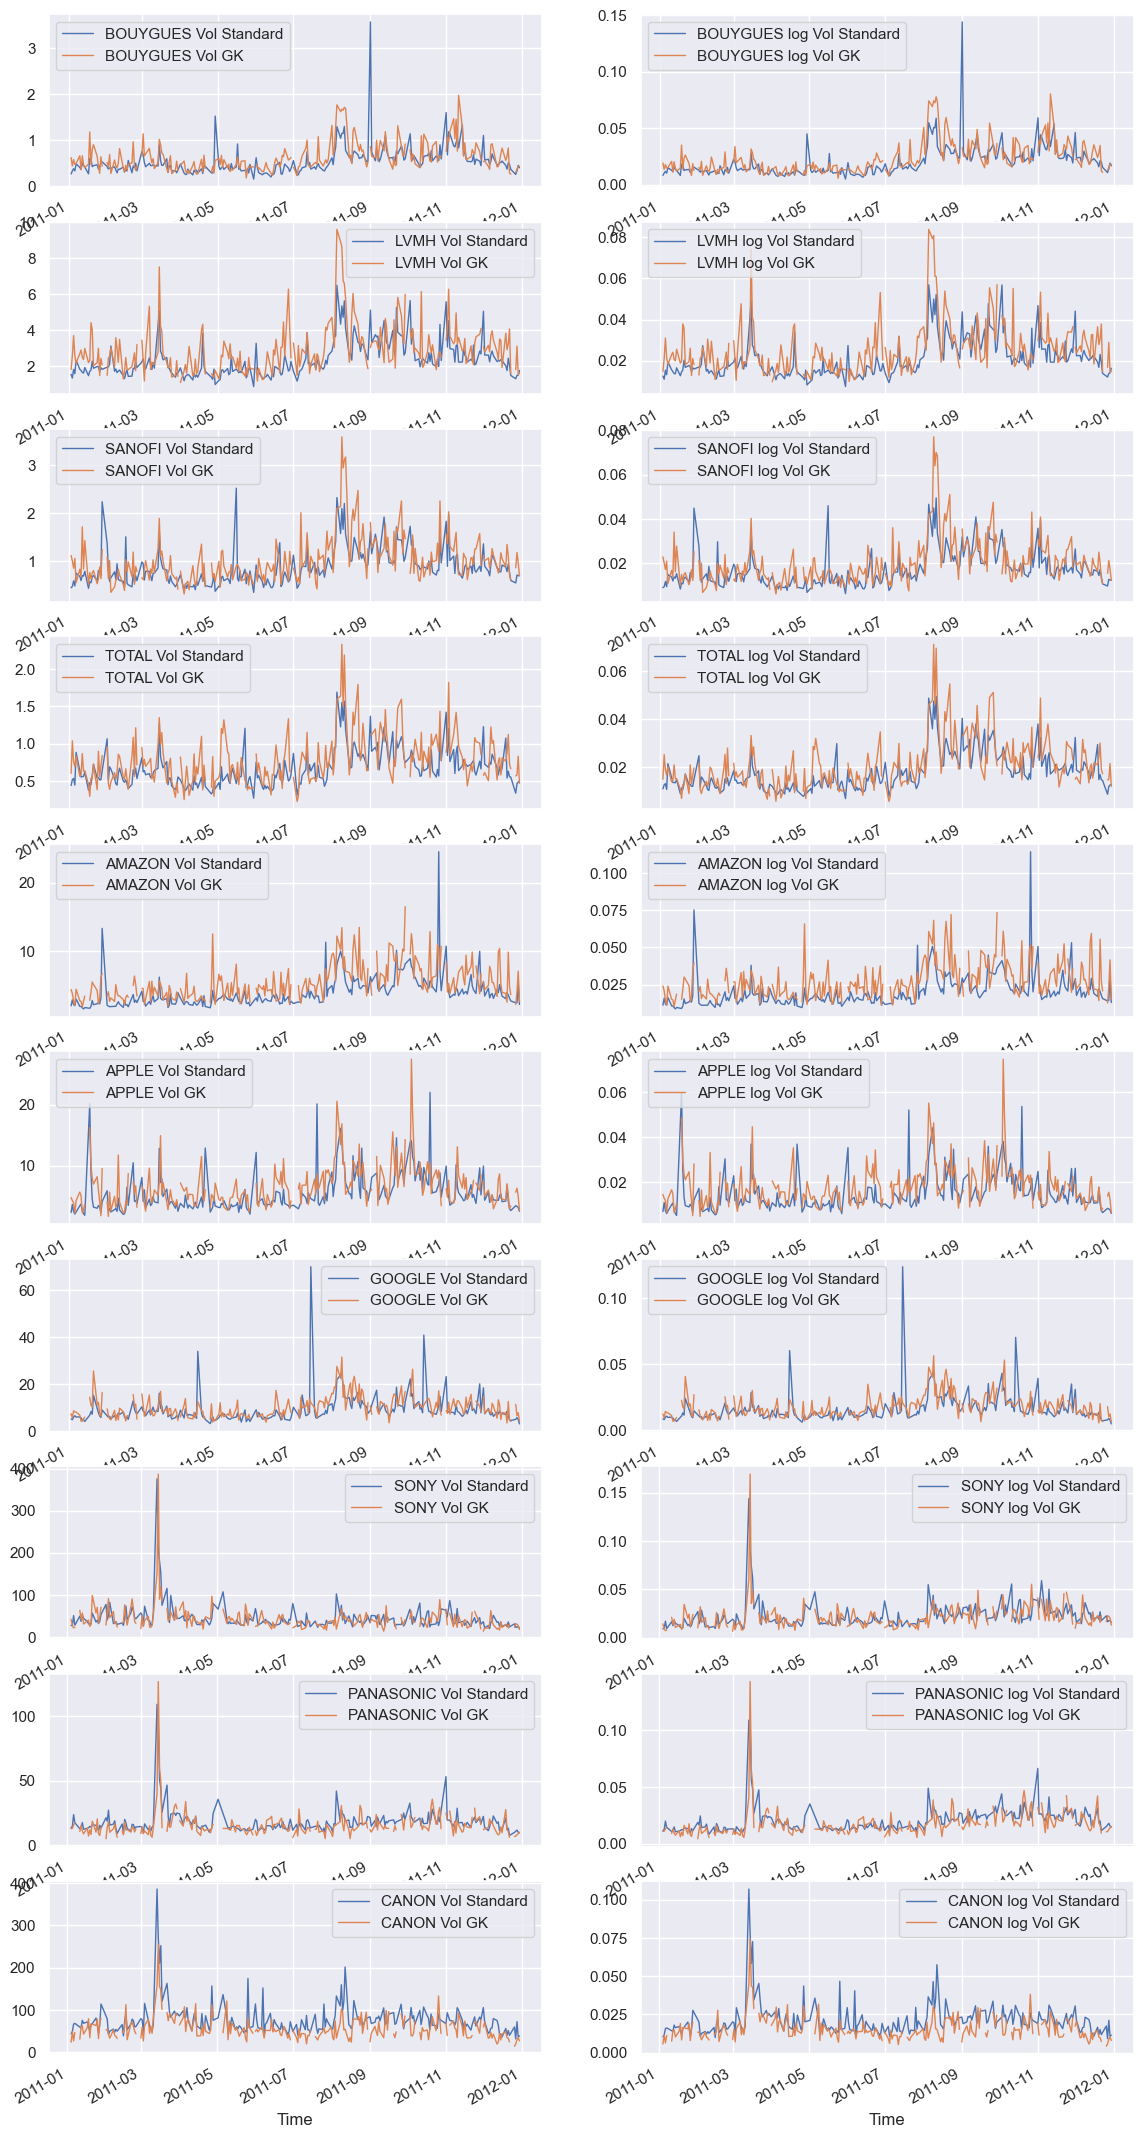

In [4]:

stocks = stocksEU + stocksUS + stocksJP
fig, ax = plt.subplots(len(stocks),2, figsize=(14, 30))

for i, stock in enumerate(stocks):

    df = pd.read_hdf(f'Data/{stock}.h5')
    df["MidPrice"] = (df["AskPrice"] + df["BidPrice"])/2
    dfPrice = df['TradedPrice'].resample("B").ohlc()
    dfLogPrice = np.log(dfPrice)


    volDaily = (((df["MidPrice"].diff())**2).resample("B").sum())**0.5
    volLogDaily = (((np.log(df["MidPrice"]).diff())**2).resample("D").sum())**0.5

    volDailyGK = ((dfPrice["high"] - dfPrice["low"])**2 - (2 * np.log(2) - 1)*(dfPrice["close"] - dfPrice["open"])**2)**0.5
    volLogDailyGK = ((dfLogPrice["high"] - dfLogPrice["low"])**2 - (2 * np.log(2) - 1)*(dfLogPrice["close"] - dfLogPrice["open"])**2)**0.5
    

    
    volDaily[volDaily>0].plot(ax=ax[i][0], linewidth=1, label =stock + " Vol Standard")
    volDailyGK.plot(ax=ax[i][0], linewidth=1, label =stock + " Vol GK")

    volLogDaily[volLogDaily>0].plot(ax=ax[i][1], linewidth=1, label =stock + " log Vol Standard")
    volLogDailyGK.plot(ax=ax[i][1], linewidth=1, label =stock + " log Vol GK")
    ax[i][0].legend()
    ax[i][1].legend()
plt.show()



- **Overview of the Garman-Klass Estimator:**  
  - Uses only the high, low, open, and close prices to gauge intraday volatility.  
  - Praised for its simplicity, making it effective for short time frames.

- **Application in the Exercise:**  
  - Integrated variance is computed for both mid-prices and log-mid prices with the Garman-Klass method.  
  - This approach is directly compared with the realized variance estimator, which utilizes the entire set of price data.

- **Differences in Data Utilization:**  
  - The Garman-Klass estimator, relying solely on four key price points, naturally produces different variance estimates compared to the realized variance estimator that factors in all price movements.  
  - This distinction highlights that each estimator captures different aspects of price fluctuations.

- **Strengths and Limitations:**  
  - While the method provides a quick and reasonable estimate of volatility, it might miss some subtle nuances of price dynamics.  
  - Such differences in detail can lead to noticeable variances in results when compared to more comprehensive estimators.

- **Interpreting the Metrics:**  
  - The measure denoted by \(\sigma_{GK}\) reflects absolute price changes, making it potentially more suitable for assets with high absolute prices.  
  - Conversely, \(\hat{\sigma}\) captures relative price changes, which might better suit assets with lower absolute prices.  
  - Generally, one might expect \(\hat{\sigma}\) to be higher for lower-priced stocks, and the reverse for higher-priced stocks, though this can vary by asset.

- **Daily Volatility Patterns and Insights:**  
  - The Garman-Klass volatility curve mirrors the patterns seen in traditional standard deviation estimations by highlighting days with extreme price movements.  
  - Its ability to delineate the roughness of volatility adds another layer of insight into the market dynamics.

- **Commentary:**  
  - Comparing the results from the Garman-Klass estimator and the realized variance estimator underscores the importance of choosing the right tool for volatility analysis.  
  - Discrepancies between the two can indicate which estimator might be more effective under specific market conditions or for particular assets.  
  - Ultimately, understanding the trade-offs between using simplified versus comprehensive price information is key to accurately capturing intraday volatility.

## II. Covariance Estimator and Epps Effect

### 1. "Classical" Covariance Estimator

Let $X^1= \log P^1$ and $X^2 = \log P^2$ be two log-price processes. 
$$d X^1 = \mu_t^1dt+\sigma_{t-}^1dW^1_t,$$
$$d X^2 = \mu_t^2dt+\sigma_{t-}^2dW^2_t,$$
with $d\left\langle W^1,W^2\right\rangle_t=\rho_tdt$.

Set for every $j\in{1,\ldots,T/\Delta}$, $r^1_{\Delta}(j)=X^1_{\Delta j}-X^1_{\Delta(j-1)}$ and $r^2_{\Delta}(j)=X^2_{\Delta j}-X^2_{\Delta(j-1)}$ the log-price increments.

Then the integrated covariance between the two assets reads
$$\int_0^T\rho_s\sigma^1_s\sigma^2_sds=\lim_{\Delta\to0}\sum_{j=1}^{T/\Delta}r^1_{\Delta}(j)r^2_{\Delta}(j).$$
Thus, an estimator for the realized covariance may be written as 
$$\hat{C}_R(\Delta)=\sum_{j=1}^{T/\Delta}r^1_{\Delta}(j)r^2_{\Delta}(j).$$ 
This estimator is consistent since 
$$\hat{C}_R(\Delta)\overset{\mathbb{P}}{\underset{\Delta\to0}{\longrightarrow}}\int_0^T\rho_s\sigma^1_s\sigma^2_sds.$$ 

The problem is that we must have synchronous data, but the quotations and transactions are asynchronous.

### 2. Previous Tick Estimator

Assume now that we observe $P^1$ at times $(T^1_j)_{j\geq1}$ and $P^2$ at times $(T^2_j)_{j\geq1}$. Therefore we design 
$$\bar{P}^1_t=P_{T^1_j} \quad{for }t\in[T^1_j,T^1_{j+1})$$
and
$$\bar{P}^2_t=P_{T^2_j} \quad{for }t\in[T^2_j,T^1_{j+1}).$$
Then 
$$\bar{X}^1_t=\log \bar{P}^1_t \quad{and}\quad\bar{X}^2_t=\log \bar{P}^2_t/$$

For a given $\Delta$, the previous tick covariation estimator is
$$\bar{C}_R(\Delta)=\sum_{j=1}^{T/\Delta}\left(\bar{X}^1_{\Delta j}-\bar{X}^1_{\Delta (j-1)}\right)\left(\bar{X}^2_{\Delta j}-\bar{X}^2_{\Delta (j-1)}\right).$$

### 3. Epps Effect

Epps (1979): "Correlations among price changes [...] are found to decrease with the length of the interval for which the price changes are measured."
Many explanations were proposed
- systematic bias for this estimator,
- "lead-lag" effect for the assets in the same sector,
- asynchronicity of transactions,
- "tick" effect and other microstructure effects.

**Example.** Assume that $X^1$ and $X^2$ are two Brownian motions with correlation $\rho$ and the trade times are arrival times of two independent Poisson processes. Then, one can show that
$$\mathbb{E}[\bar{C}_R(\Delta)]\underset{\Delta\to0}{\longrightarrow}0.$$

<font color='blue'>**To do.** Plot the correlation with respect to $\Delta$ (in minutes or seconds) for couples of asset on the same exchange (using the mid-price and the log-mid-price). Comment the results.</font>

100%|██████████| 120/120 [00:21<00:00,  5.67it/s]


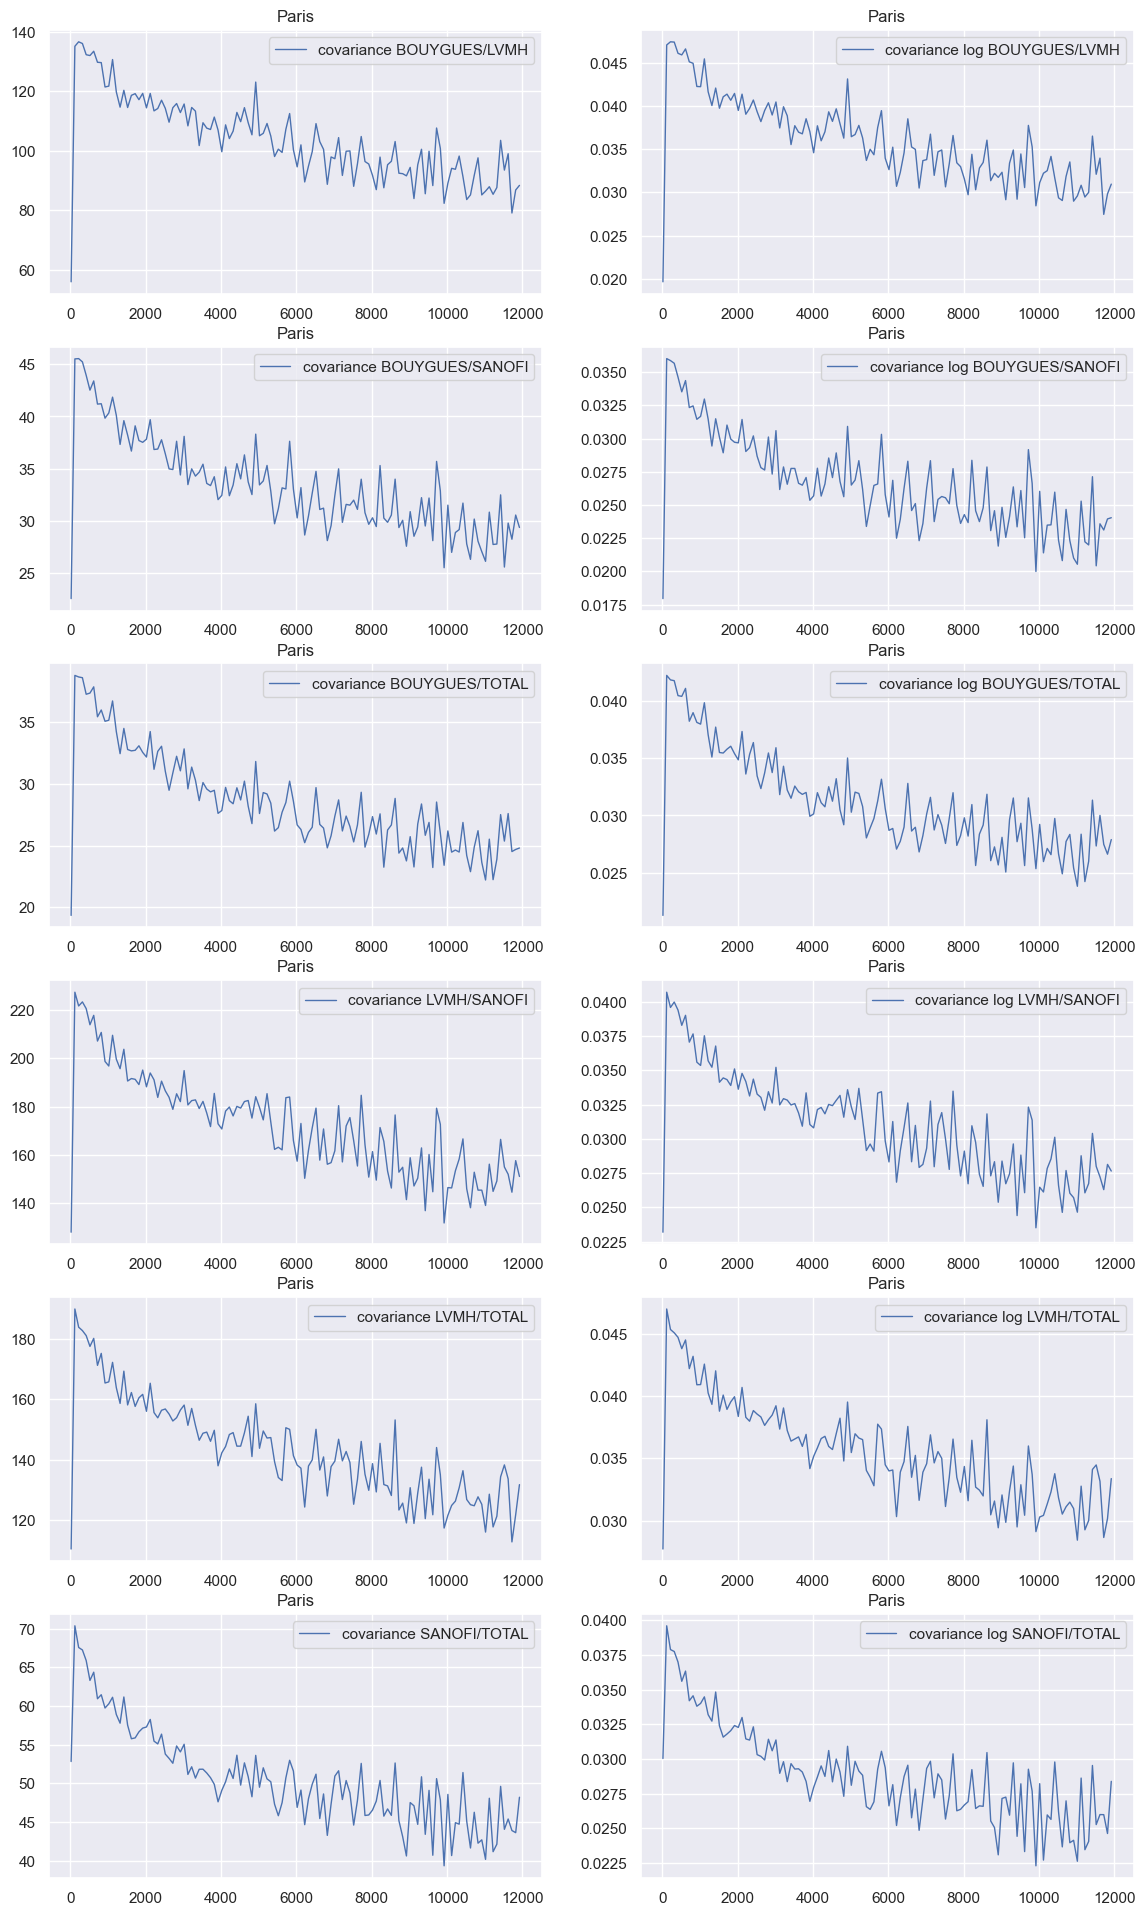

In [5]:
from itertools import combinations

step_size = range(20, 12000, 100)
steps = [f"{i}s" for i in step_size]

stocks = stocksEU
market = "Paris"
fig, ax = plt.subplots(len(list(combinations(stocks,2))), 2, figsize=(14, 24))

for i, (stock1, stock2) in enumerate(combinations(stocks,2)):
    ax[i][0].set_title(market)
    ax[i][1].set_title(market)
    cov_list = []
    covLog_list = []
    df1 = pd.read_hdf(f'Data/{stock1}.h5')
    df2 = pd.read_hdf(f'Data/{stock2}.h5')
    df1["midPrice"] = (df1["AskPrice"] + df1["BidPrice"])/2
    df2["midPrice"] = (df2["AskPrice"] + df2["BidPrice"])/2

    for step in tqdm(steps):   
        dfPrice1 = (df1["midPrice"]).resample(step).last()
        dfPrice2 = (df2["midPrice"]).resample(step).last()

        dfPriceLog1 = np.log(dfPrice1)
        dfPriceLog2 = np.log(dfPrice2)

        cov = (dfPrice1.diff() * dfPrice2.diff()).sum()
        covLog = (dfPriceLog1.diff() * dfPriceLog2.diff()).sum()


        cov_list.append(cov)
        covLog_list.append(covLog)

    cov_list = pd.Series(cov_list, index=step_size)
    covLog_list = pd.Series(covLog_list, index=step_size)

    cov_list.plot(ax=ax[i][0], linewidth=1, label =f"covariance {stock1}/{stock2}")
    covLog_list.plot(ax=ax[i][1], linewidth=1, label =f"covariance log {stock1}/{stock2}")

    ax[i][0].legend()
    ax[i][1].legend()
plt.show()

100%|██████████| 120/120 [00:21<00:00,  5.71it/s]


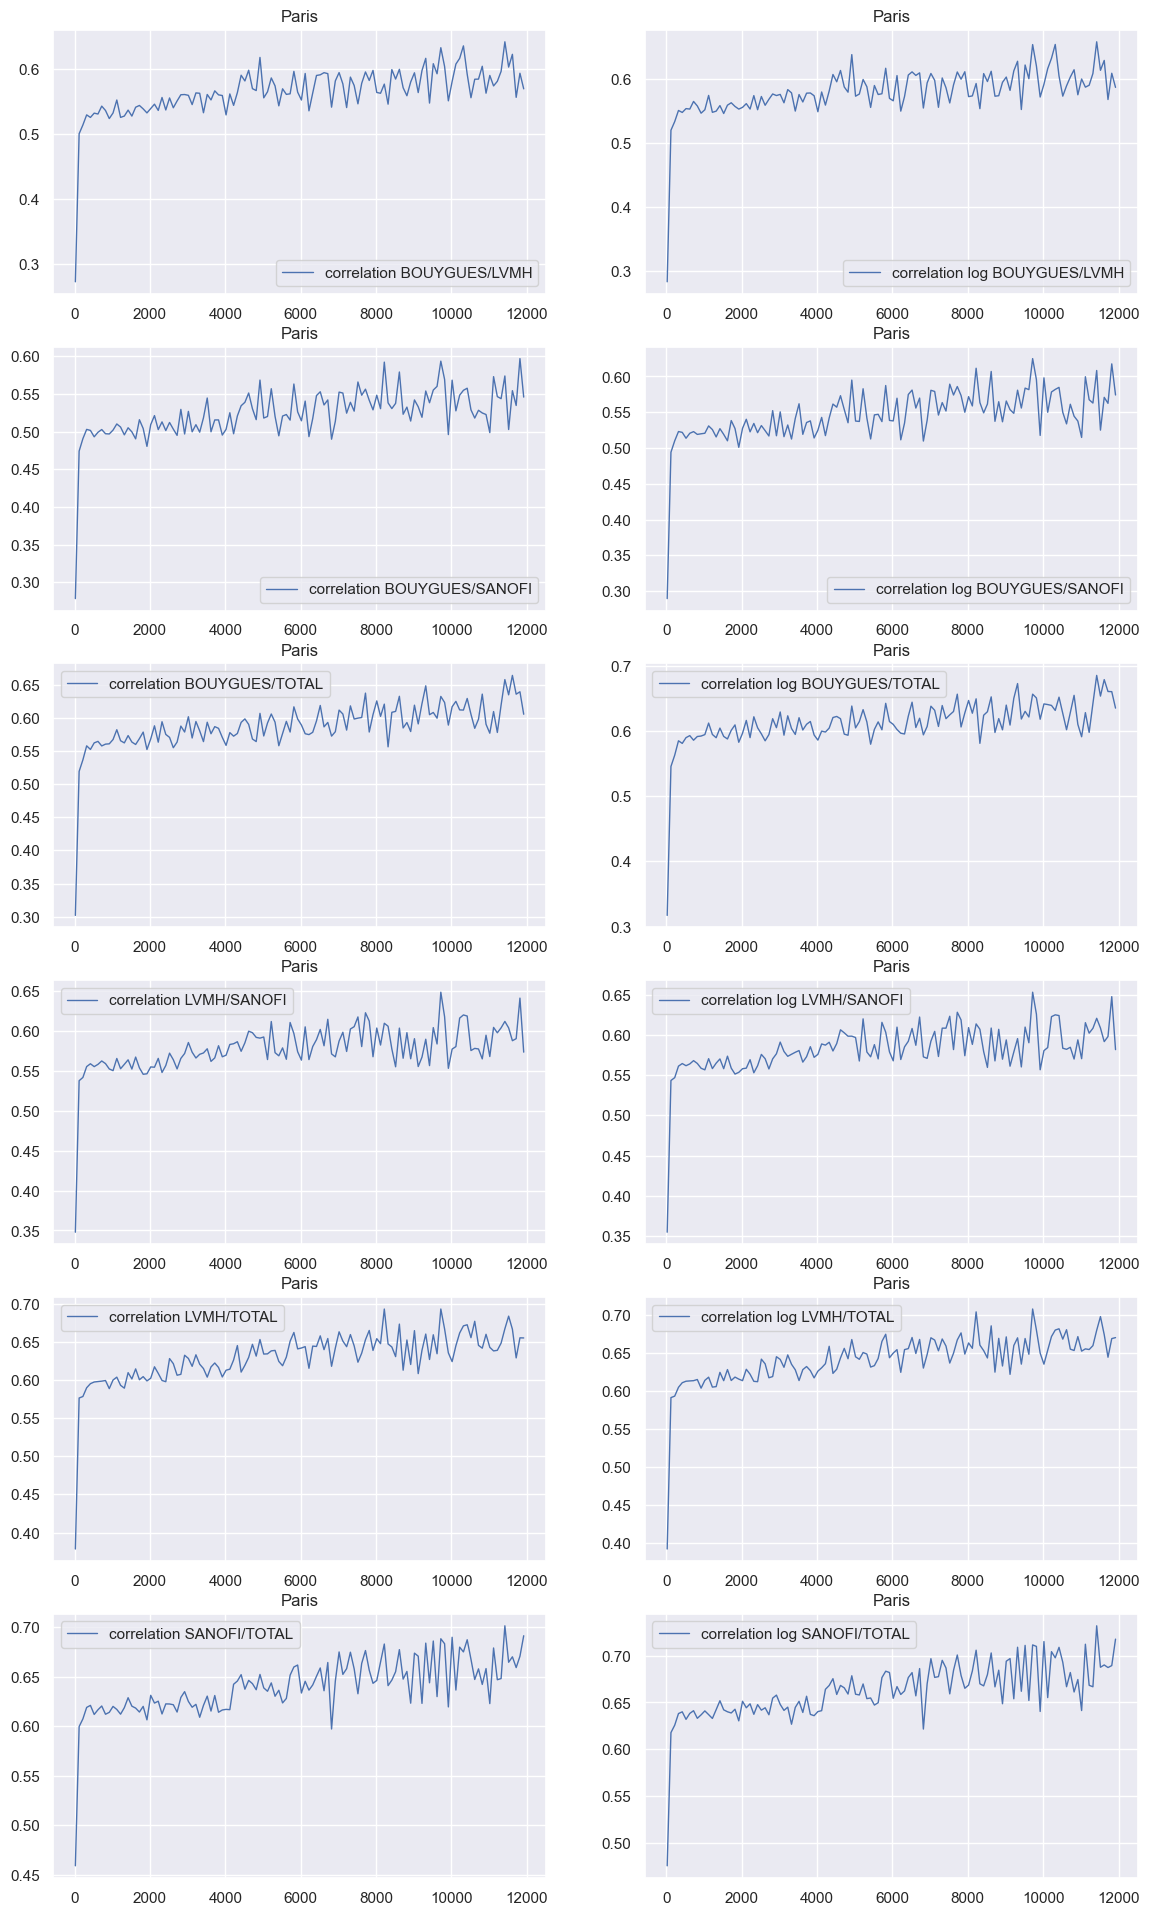

In [6]:
from itertools import combinations

step_size = range(20, 12000, 100)
steps = [f"{i}s" for i in step_size]

stocks = stocksEU
market = "Paris"
fig, ax = plt.subplots(len(list(combinations(stocks,2))), 2, figsize=(14, 24))

for i, (stock1, stock2) in enumerate(combinations(stocks,2)):
    ax[i][0].set_title(market)
    ax[i][1].set_title(market)
    cor_list = []
    corLog_list = []
    df1 = pd.read_hdf(f'Data/{stock1}.h5')
    df2 = pd.read_hdf(f'Data/{stock2}.h5')
    df1["midPrice"] = (df1["AskPrice"] + df1["BidPrice"])/2
    df2["midPrice"] = (df2["AskPrice"] + df2["BidPrice"])/2

    for step in tqdm(steps):   
        dfPrice1 = (df1["midPrice"]).resample(step).last()
        dfPrice2 = (df2["midPrice"]).resample(step).last()

        dfPriceLog1 = np.log(dfPrice1)
        dfPriceLog2 = np.log(dfPrice2)

        cov = (dfPrice1.diff() * dfPrice2.diff()).sum()
        covLog = (dfPriceLog1.diff() * dfPriceLog2.diff()).sum()

        std1 = (((dfPrice1.diff())**2).sum())**0.5
        std2 = (((dfPrice2.diff())**2).sum())**0.5

        stdLog1 = (((dfPriceLog1.diff())**2).sum())**0.5
        stdLog2 = (((dfPriceLog2.diff())**2).sum())**0.5

        cor_list.append(cov/std1/std2)
        corLog_list.append(covLog/stdLog1/stdLog2)

    cor_list = pd.Series(cor_list, index=step_size)
    corLog_list = pd.Series(corLog_list, index=step_size)

    cor_list.plot(ax=ax[i][0], linewidth=1, label =f"correlation {stock1}/{stock2}")
    corLog_list.plot(ax=ax[i][1], linewidth=1, label =f"correlation log {stock1}/{stock2}")

    ax[i][0].legend()
    ax[i][1].legend()
plt.show()

The correlation estimator for high-frequency data is studied in many publications, for example Hayashi & Yoshida or Zhang.

### 4. Hayashi-Yoshida Estimator

Let $I^1_i=(T^1_i,T^1_{i+1}]$, $i\geq1$, and $I^2_j=(T^2_j,T^2_{j+1}]$, $j\geq1$.

The cumulative covariance estimator of Hayashi-Yoshida reads
$$U_n=\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}.$$

That is, the product of any pair of increments $\Delta P^1(I^1_i)$ and $\Delta P^2(I^2_j)$ will make a contribution to the summation only when the respective observation intervals $I^1_i$ and $I^2_i$ are overlapping.

This estimator does not need any selection of $\Delta$ and is convergent if the arrival times are independent from the price.

Then, they define two associated correlation estimators
- if $\sigma_1$ and $\sigma_2$ are known,
$$R^1_n=\frac1T\frac{\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}}{\sigma_1\sigma_2},$$
- if $\sigma_1$ and $\sigma_2$ are known/unknown,
$$R^2_n=\frac{\sum_{i,j}\Delta P^1(I^1_i)\Delta P^2(I^2_j)\mathbb{1}_{\{I^1_i\cap I^2_j\neq\emptyset\}}}{\sqrt{\sum_i\Delta P^1(I^1_i)^2}\sqrt{\sum_j\Delta P^2(I^2_j)^2}}.$$
Under the same conditions as for $U_n$, $R^1$ and $R^2$ are consistent for $\rho$ as $n\to\infty$.

**Remark.** This estimator is nevertheless not robust to microstructure effects.

<font color='blue'>**To do.** Compute the daily Hayashi-Yoshida estimator for couples of assets on the same exchange and compare it to classical estimator. Do it for one month you choose and plot the results. Comment. </font>

100%|██████████| 20/20 [08:10<00:00, 24.52s/it]


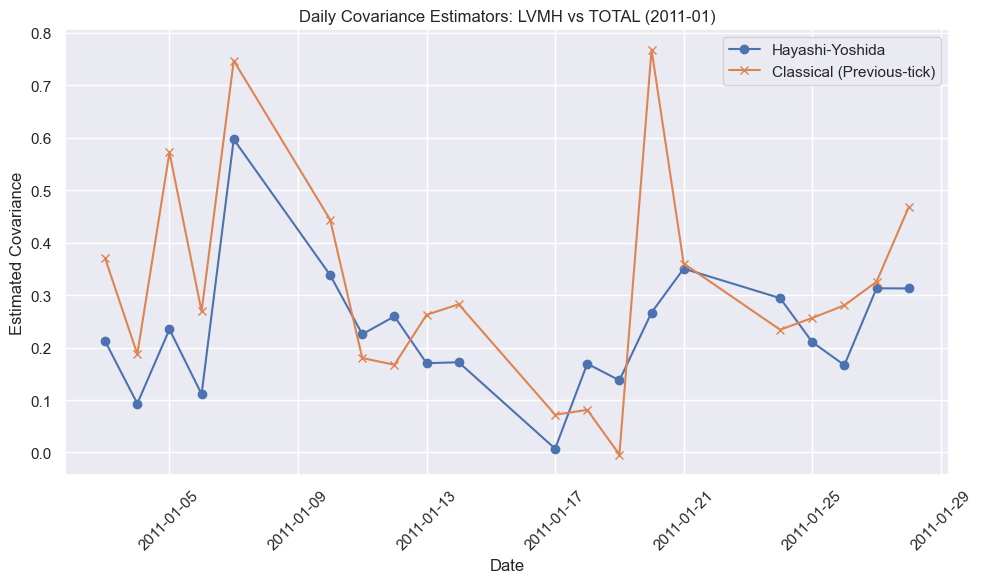

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


stock1 = 'LVMH'
stock2 = 'TOTAL'

df1 = pd.read_hdf(f'Data/{stock1}.h5')
df2 = pd.read_hdf(f'Data/{stock2}.h5')

df2 = df2.groupby(df2.index).last()
df1 = df1.groupby(df1.index).last()


month = '2011-01'
df1_month = df1[df1.index.strftime('%Y-%m') == month]
df2_month = df2[df2.index.strftime('%Y-%m') == month]


def seconds_from_midnight(dt):
    return dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6


def hayashi_yoshida(t1, p1, t2, p2):
    """
    Compute the Hayashi-Yoshida covariance estimator given two price series with timestamps.
    t1, t2: numpy arrays of times (in seconds from midnight)
    p1, p2: corresponding traded prices
    """
    r1 = np.diff(p1)
    r2 = np.diff(p2)
    t1_start = t1[:-1]
    t1_end   = t1[1:]
    t2_start = t2[:-1]
    t2_end   = t2[1:]
    
    cov = 0.0
    for i in range(len(r1)):
        for j in range(len(r2)):
            if max(t1_start[i], t2_start[j]) < min(t1_end[i], t2_end[j]):
                cov += r1[i] * r2[j]
    return cov

def classical_covariance(t1, p1, t2, p2, grid_points=100):
    """
    Compute the classical realized covariance by synchronizing the two series
    to a common grid using previous-tick interpolation.
    
    t1, p1: times (seconds) and prices for asset 1.
    t2, p2: times (seconds) and prices for asset 2.
    grid_points: number of grid points to use between the common start and end times.
    """
    start = max(t1[0], t2[0])
    end   = min(t1[-1], t2[-1])
    if end <= start:
        return np.nan 
    
    grid = np.linspace(start, end, grid_points)
    
    p1_grid = np.array([p1[np.searchsorted(t1, t, side='right') - 1] for t in grid])
    p2_grid = np.array([p2[np.searchsorted(t2, t, side='right') - 1] for t in grid])
    
    ret1 = np.diff(p1_grid)
    ret2 = np.diff(p2_grid)
    return np.sum(ret1 * ret2)

grouped1 = df1_month.groupby(pd.Grouper(freq='B'))
grouped2 = df2_month.groupby(pd.Grouper(freq='B'))

hy_daily = []
classical_daily = []
dates_list = []

for day, group1 in tqdm(grouped1):
    if day not in grouped2.groups:
        continue
    group2 = grouped2.get_group(day)
    
    
    t1 = np.array([seconds_from_midnight(ts) for ts in group1.index])
    t2 = np.array([seconds_from_midnight(ts) for ts in group2.index])

    p1 = group1['TradedPrice'].values
    p2 = group2['TradedPrice'].values
    
    hy_val = hayashi_yoshida(t1, p1, t2, p2)
    cl_val = classical_covariance(t1, p1, t2, p2, grid_points=100)
    
    hy_daily.append(hy_val)
    classical_daily.append(cl_val)
    dates_list.append(day)

results_df = pd.DataFrame({
    'Hayashi-Yoshida': hy_daily,
    'Classical': classical_daily
}, index=dates_list).sort_index()


plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Hayashi-Yoshida'], marker='o', label='Hayashi-Yoshida')
plt.plot(results_df.index, results_df['Classical'], marker='x', label='Classical (Previous-tick)')
plt.xlabel('Date')
plt.ylabel('Estimated Covariance')
plt.title(f'Daily Covariance Estimators: {stock1} vs {stock2} ({month})')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Comments**

Our analysis indicates that the classical estimator not only exhibits substantially higher variance compared to the Hayashi-Yoshida estimator but also shows a pronounced bias toward trading days.

## III. Link between bid-ask spread and volatility per trade for large tick assets

Dayri and Rosenbaum developed a new approach to exhibit the relationship between bid-ask spread and volatility per trade for large tick assets. The model derives from the one with uncertainty zones. They assume the existence of a {\em latent price} representing the opinion of market participants on the ``true'' price and modeled by a continuous Brownian semi-martingale $(x_t)_{t\geq0}$. Let $\alpha$ be the tick size of the asset. The areas of uncertainty are defined as bands around the middle of the tick size with width $2\eta\alpha$, $0<\eta<1$. The dynamics of the price of the last transaction $p_t$ is obtained as a function of the latent price and areas of uncertainty. The bid-ask spread is assumed to be constant and equal to the tick size $\alpha$. 

The authors define alternating (resp. continuity) of a tick size as a jump in the price of a tick size whose direction is adverse (resp. the same) than the previous jump. The number of alternations and continuities of a tick size are denoted by $N_{\alpha,t}^{(a)}$ and $N_{\alpha,t}^{(c)}$ respectively on the period $[0,t]$. The consistent estimator of $\eta$ on $[0,t]$ is then
$$\widehat{\eta}_{\alpha,t}=\frac{N_{\alpha,t}^{(c)}}{2N_{\alpha,t}^{(a)}}.$$
For volatility, first note that this model allows to find the value of the latent price on the date of $\tau_i$ of the $i^{th}$ price change by the simple relationship
$$x_{\tau_i}=p_{\tau_i}-{sign}\left(p_{\tau_i}-p_{\tau_{i-1}}\right)\left(\frac12-\eta\right)\alpha.$$
As we can estimate $\eta$, we can then find out $x_{\tau_i}$ from $p_{\tau_{i-1}}$ and $p_{\tau_i}$. For example, the realized variance on estimated values of the efficient price on $[0,t]$
$$\widehat{\sigma^2_{LP,t}}=\sum_{\tau_i\leq t}\left(\widehat{x}_{\tau_i}-\widehat{x}_{\tau_{i-1}}\right)^2,$$
where $\widehat{x}_{\tau_i}=p_{\tau_i}-{sign}\left(p_{\tau_i}-p_{\tau_{i-1}}\right)\left(\frac12-\widehat{\eta}_{\alpha,t}\right)\alpha$, is an estimator of the integrated variance of the latent price over $[0,t]$ $\int_0^t\sigma_s^2ds$. Now we set $\widehat{\sigma}_{LP}=\sqrt{\widehat{\sigma^2_{[0,t]}}}$ and we define the volatility per trade by $\widehat{\sigma}_{LP}/\sqrt{N}$ where $N:=N_{[0,t]}$ denotes the total number of trades on $[0,t]$. Without making any differences between parameters and their estimates, we get then the following relationship
$$ \eta * \alpha ≈ c * ( \sigma_{LP} / \sqrt{N} )
$$
Market participants have a certain resolution, or precision at which they infer the efficient price $x_t$. $\eta$ quantifies this resolution: when $\eta$ is close to 1/2, the resolution is close to the tick value. The quantity $2\eta\alpha$ can be seen as an implicit spread: $\eta$ can indeed be viewed as a suitable measure for the tick size.


<font color='blue'>**To do.** 1. Compute $\eta$, $\alpha$ and $\sigma_{LP}$ on a daily basis for each asset. Compare the implicit spread and the real spread. Idem for the volatilities of both latent price and traded price. Comment.</font>

In [8]:
def compute_daily_metrics(df):

    daily_metrics = []
    

    for day, group in df.groupby(pd.Grouper(freq='B')):
        
        group = group.sort_index()
        prices = group['TradedPrice']
        alpha = (df['AskPrice'] - df['BidPrice']).min()
        # Realized variance over the day (sum of squared returns)
        RV = np.sum(np.diff(prices)**2)
        traded_vol = np.sqrt(RV)
    
        # eta 
        priceChange = (prices.diff()*prices.diff().shift(-1)).dropna()
        nAlt = (priceChange < 0).sum()
        nCont = (priceChange > 0).sum()
        eta = nCont/(2*nAlt)

        # Real (quoted) spread: average of (AskPrice - BidPrice) over the day.
        bid = group['BidPrice']
        ask = group['AskPrice']
        real_spread = np.mean(ask - bid)
        
        implicit_spread = 2*alpha*eta

        latentPrice =  (prices -np.sign(prices.diff())*(0.5 - eta)*alpha).dropna()
        sigma_LP = np.sqrt(np.sum(np.diff(latentPrice)**2))
        daily_metrics.append({
            'date': pd.to_datetime(day),
            'alpha': alpha,
            'eta': eta,
            'sigma_LP': sigma_LP,
            'implicit_spread': implicit_spread,
            'real_spread': real_spread,
            'traded_vol': traded_vol,
            'RV': RV,
            'nTrades' : group.shape[0],
        })
        
    return pd.DataFrame(daily_metrics).set_index('date').dropna()


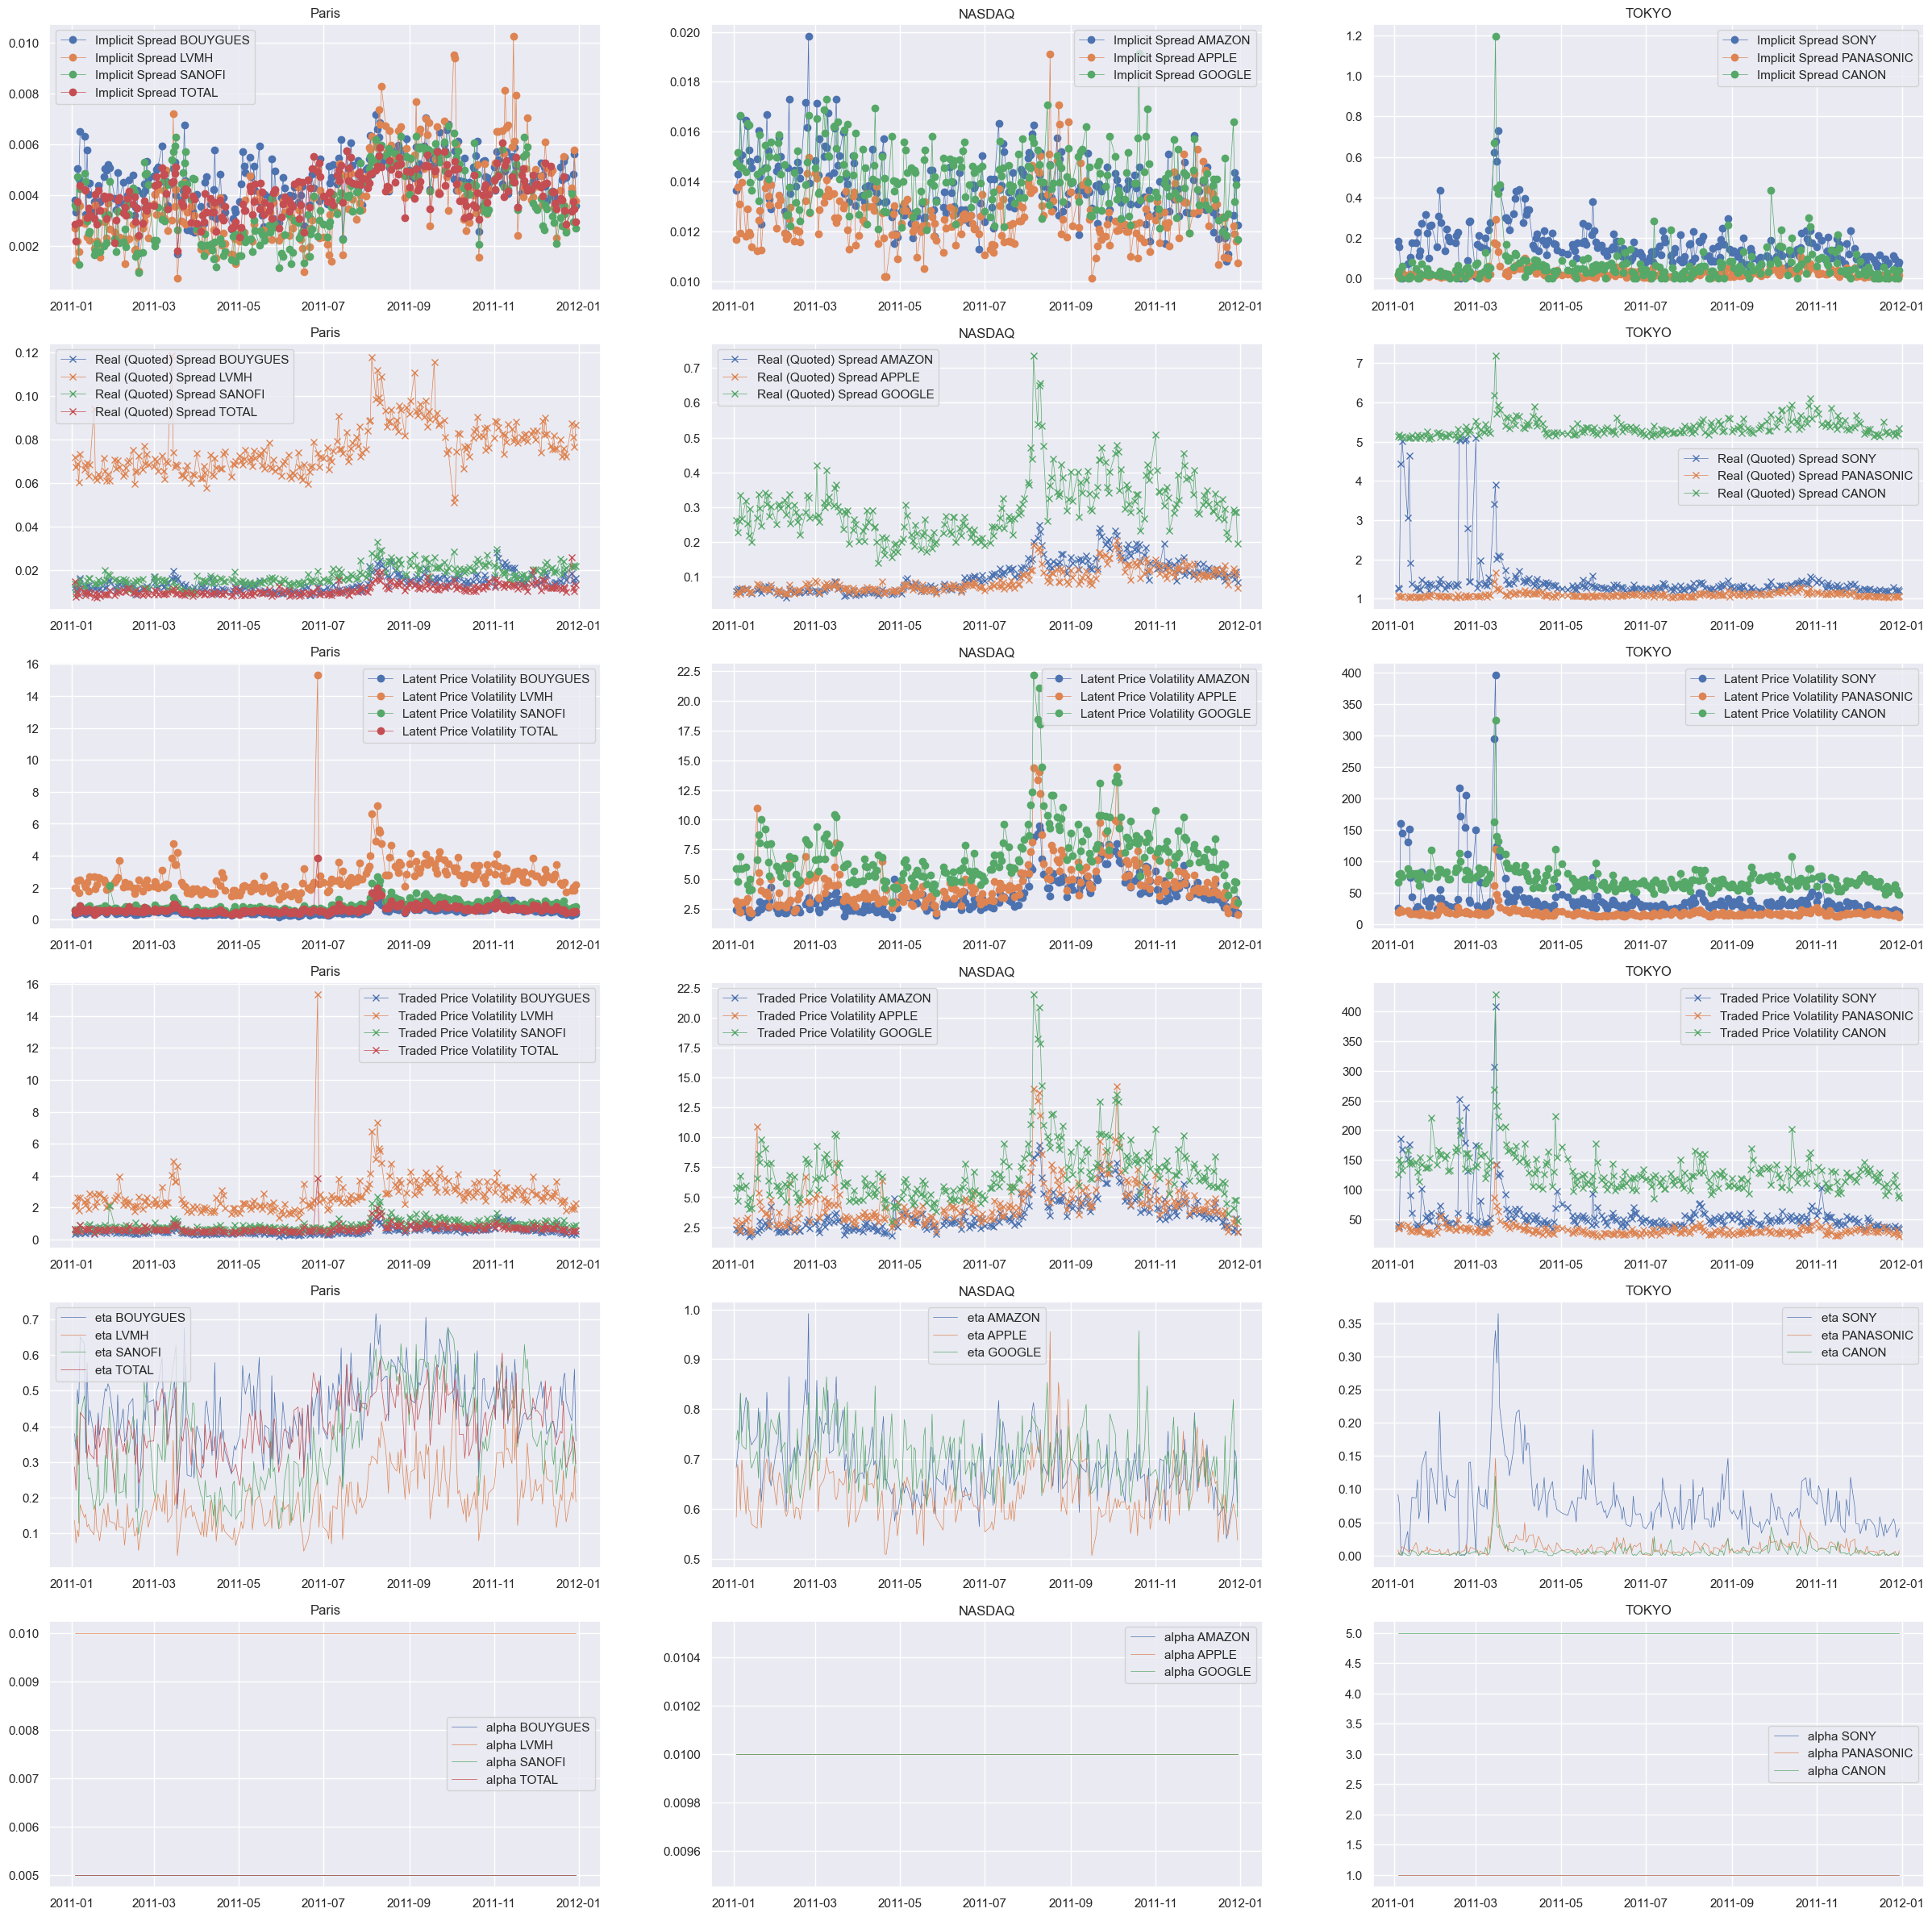

In [9]:
fig, ax = plt.subplots(6, 3, figsize=(30, 30))
for i, market in enumerate(markets):
    ax[0, i].set_title(market)
    ax[1, i].set_title(market)
    ax[2, i].set_title(market)
    ax[3, i].set_title(market)
    ax[4, i].set_title(market)
    ax[5, i].set_title(market)
    
    for stock in markets[market]:
        df = pd.read_hdf(f'Data/{stock}.h5')
        metrics = compute_daily_metrics(df)
        
        ax[0, i].plot(metrics.index, metrics['implicit_spread'],linewidth=0.5, marker='o', label=f'Implicit Spread {stock}')
        ax[1, i].plot(metrics.index, metrics['real_spread'], marker='x',linewidth=0.5, label=f'Real (Quoted) Spread {stock}')
        ax[2, i].plot(metrics.index, metrics['sigma_LP'], marker='o',linewidth=0.5, label=f'Latent Price Volatility {stock}')
        ax[3, i].plot(metrics.index, metrics['traded_vol'], marker='x',linewidth=0.5, label=f'Traded Price Volatility {stock}')
        ax[4, i].plot(metrics.index, metrics['eta'],linewidth=0.5, label=f'eta {stock}')
        ax[5, i].plot(metrics.index, metrics['alpha'],linewidth=0.5, label=f'alpha {stock}')
    
    ax[0, i].legend()
    ax[1, i].legend()
    ax[2, i].legend()
    ax[3, i].legend()
    ax[4, i].legend()
    ax[5, i].legend()

plt.show()


**Comments**
- **Eta Sensitivity and Tick Sizes:**
  - **Eta Values:**
    - **Paris (Bouygues, LVMH, Sanofi, Total)** and **Nasdaq (Amazon, Apple, Google)** stocks exhibit high eta values, meaning their mid-prices react strongly to the arrival of new orders.
    - **Tokyo (Canon, Panasonic, Sony)** stocks have very low eta values, indicating that their mid-prices are less sensitive to changes in the order book.
  - **Tick Sizes:**
    - Stocks in the Paris and Nasdaq markets tend to have lower tick sizes compared to those in the Tokyo market, possibly due to differences in market structures and regulations.

- **Market Dynamics and Spreads:**
  - **Overall Insight:**
    - The combination of tick size and eta values provides valuable insights into the market dynamics of each stock and location, which can inform trading strategies and investment decisions.
  - **Paris Market:**
    - Generally, the real spreads are lower than the implicit spreads, suggesting a competitive market.
    - **Exception:** For LVMH, the real spread is significantly higher than the implicit spread, indicating a less competitive market.
  - **Nasdaq Market:**
    - The implicit spreads are generally higher than the real spreads, implying that the market may not be as competitive as it appears.
  - **Tokyo Market:**
    - The real spreads are much higher than the implicit spreads, suggesting that the market is less efficient and competitive.
    - **Notable Case:** Canon exhibits a particularly high real spread compared to its implicit spread, indicating a highly inefficient market for this stock.

- **Additional Observations on Spreads and Volatilities:**
  - **Daily-Averaged Spreads:**
    - The daily-averaged implicit spreads are generally lower than the daily-averaged real spreads, which implies that market participants may be willing to transact at prices closer to the mid-price.
    - The magnitude of the difference between these spreads varies among different stocks and exchanges.
  - **Price Volatilities:**
    - In both the Paris and Nasdaq markets, the traded price volatilities are slightly higher than the daily-averaged latent price volatilities.
    - In the Tokyo market, however, the traded price volatilities are significantly higher than the latent price volatilities, suggesting higher levels of noise or uncertainty in the traded prices.
  - **Note:**
    - While these trends provide a general overview, individual stocks may be influenced by additional factors.



<font color='blue'> 2. Implement the linear regression for large tick asset and compare to the results of the previous practical work.</font>

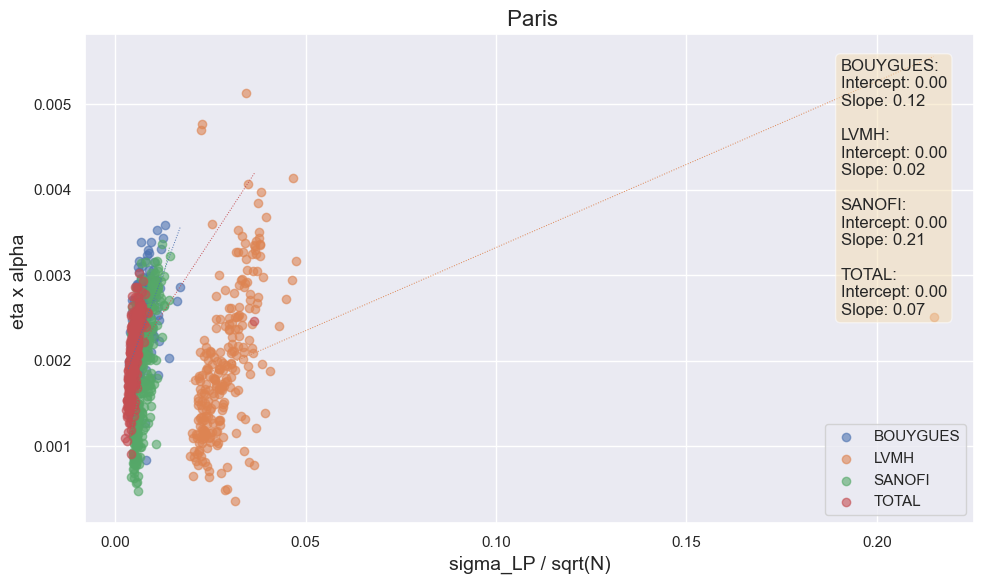

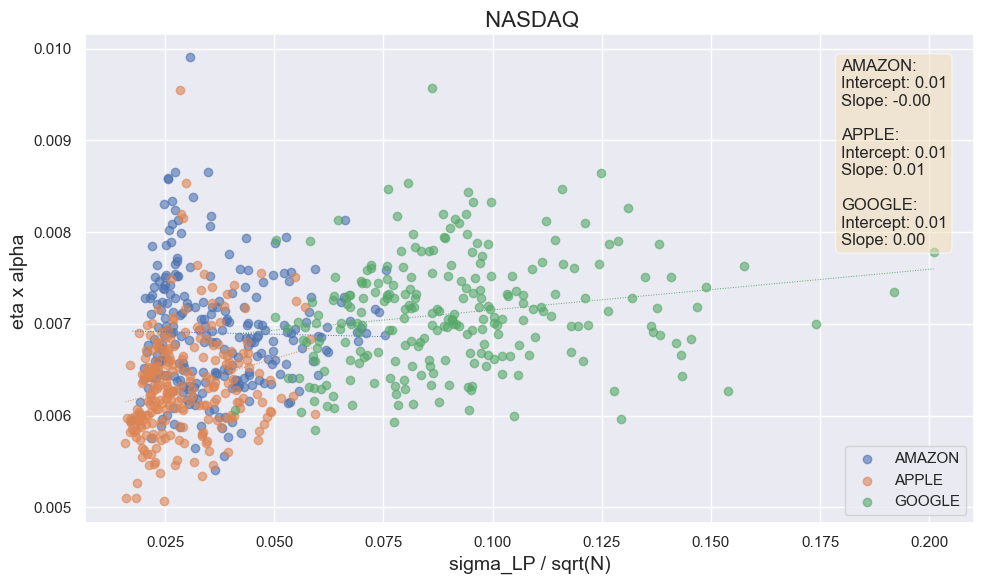

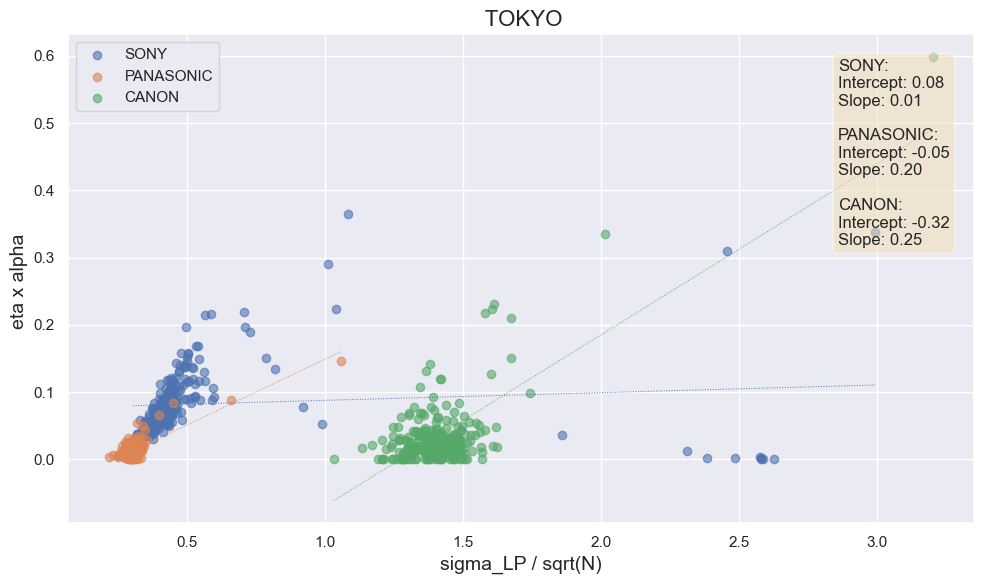

In [10]:
import statsmodels.api as sm

sns.set_theme()

params_grid = {"linestyle": 'dotted', "linewidth": 0.7}

for market in markets:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f" {market}", fontsize=16)
    
    summary_text = []
    
    for stock in markets[market]:
        df = pd.read_hdf(f'Data/{stock}.h5')
        metrics = compute_daily_metrics(df)
        x = metrics['sigma_LP'] * metrics['nTrades']**(-0.5)
        y = metrics['eta'] * metrics['alpha']
        
        ax.scatter(x, y, label=stock, alpha=0.6)
        
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        
        x_range = np.linspace(x.min(), x.max(), 100)
        X_range = sm.add_constant(x_range)
        y_pred = model.predict(X_range)
        
        ax.plot(x_range, y_pred, **params_grid)
        
        coef_summary = f"{stock}:\nIntercept: {model.params.iloc[0]:.2f}\nSlope: {model.params.iloc[1]:.2f}"
        summary_text.append(coef_summary)

    ax.set_xlabel('sigma_LP / sqrt(N)', fontsize=14)
    ax.set_ylabel('eta x alpha ', fontsize=14)
    ax.legend()
    
    summary_str = "\n\n".join(summary_text)
    ax.text(0.85, 0.95, summary_str, transform=ax.transAxes,
            verticalalignment='top', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))
    
    plt.tight_layout()
    plt.show()

- **Theoretical Insight:**  
  - The model posits that the product $\eta \alpha$ (reflecting the market's price resolution relative to the tick size) is approximately proportional to the volatility per trade, $\sigma_{LP}/\sqrt{N}$  
  - This proportionality suggests that as volatility per trade increases, the effective spread (or resolution) also increases, consistent with market microstructure theories.

- **Affine Relationship via Regression:**  
  - An affine relationship implies that a linear regression of $\eta \alpha$ on $\sigma_{LP}/\sqrt{N}$ would yield a straight-line fit, possibly with a non-zero intercept.  
  - The constant \(c\) in the equation  
    $$
    \eta \alpha \approx c \left(\frac{\sigma_{LP}}{\sqrt{N}}\right)
    $$ 
    acts as the slope (and potentially part of the intercept) in this relationship.

- **Empirical Confirmation:**  
  - By performing linear regression on observed data, one can validate that the relationship between the two variables is indeed linear (or affine), supporting the theoretical model.  
  - This result indicates that market dynamics captured by $\eta$ and $\alpha$ are directly linked to the volatility characteristics of the asset.

- **Practical Implications:**  
  - Confirming an affine relationship helps in calibrating models that incorporate market microstructure effects, especially for large tick assets.  
  - It provides a quantitative basis for understanding how changes in order flow and volatility influence the perceived price resolution in the market.
